In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from lib.scraper import get_json

# Helper function to get stint data from track and year
def get_stint_data(
    track: str,
    year: int
):
    session_info = get_json(
        "https://api.openf1.org/v1/sessions",
        params={
            "circuit_short_name": track,
            "session_name": "Race",
            "year": year
        }
    )[0]

    session = get_json(
        "https://api.openf1.org/v1/stints",
        params={
            "session_key": session_info["session_key"]
        }
    )

    return session

In [87]:
get_json(
    "https://api.openf1.org/v1/sessions",
    params={
        "session_name": "Race",
        "year": 2025
    }
)

[{'meeting_key': 1254,
  'session_key': 9693,
  'location': 'Melbourne',
  'date_start': '2025-03-16T04:00:00+00:00',
  'date_end': '2025-03-16T06:00:00+00:00',
  'session_type': 'Race',
  'session_name': 'Race',
  'country_key': 5,
  'country_code': 'AUS',
  'country_name': 'Australia',
  'circuit_key': 10,
  'circuit_short_name': 'Melbourne',
  'gmt_offset': '11:00:00',
  'year': 2025},
 {'meeting_key': 1255,
  'session_key': 9998,
  'location': 'Shanghai',
  'date_start': '2025-03-23T07:00:00+00:00',
  'date_end': '2025-03-23T09:00:00+00:00',
  'session_type': 'Race',
  'session_name': 'Race',
  'country_key': 53,
  'country_code': 'CHN',
  'country_name': 'China',
  'circuit_key': 49,
  'circuit_short_name': 'Shanghai',
  'gmt_offset': '08:00:00',
  'year': 2025},
 {'meeting_key': 1256,
  'session_key': 10006,
  'location': 'Suzuka',
  'date_start': '2025-04-06T05:00:00+00:00',
  'date_end': '2025-04-06T07:00:00+00:00',
  'session_type': 'Race',
  'session_name': 'Race',
  'country

In [39]:
from lib.model_builder import F1StrategyOptimizer, tyre_tuple
import pyomo.environ as pyo

optimizer = F1StrategyOptimizer(
    track="Singapore",
    race_laps=62,
    pit_stop_overhead=29.1,
    available_tyres=[
        tyre_tuple("SOFT_0", "SOFT", 2),
        tyre_tuple("SOFT_1", "SOFT", 2),
        tyre_tuple("SOFT_2", "SOFT", 3),
        tyre_tuple("SOFT_3", "SOFT", 3),
        tyre_tuple("SOFT_4", "SOFT", 0),
        tyre_tuple("MED_0", "MEDIUM", 7),
        tyre_tuple("MED_1", "MEDIUM", 0),
        tyre_tuple("HARD_0", "HARD", 0),
    ],
    models_path="../models"
)

model = optimizer.build_model()

solver = pyo.SolverFactory("glpk")
results = solver.solve(model, tee=False)

optimizer.print_results(results, model)

/home/zeta/.conda/envs/prescriptive/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/zeta/.conda/envs/prescriptive/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Track        : Singapore
Race Laps    : 62
Pit Stop Time: 29.1

Available Tyres:
  SOFT_0 (Age: 2)
  SOFT_1 (Age: 2)
  SOFT_2 (Age: 3)
  SOFT_3 (Age: 3)
  SOFT_4 (Fresh)
  MED_0 (Age: 7)
  MED_1 (Fresh)
  HARD_0 (Fresh)

Max Tyre Age:
  SOFT: 25
  MEDIUM: 34
  HARD: 39

===== OPTIMIZED STRATEGY =====
Total race time: 6158.11 s
Stints used    : 2
Pit stops      : 1

Stint details:
  SOFT_1:
    Laps run : 23
    Stint time: 2271.79 s
  HARD_0:
    Laps run : 39
    Stint time: 3857.23 s


In [ ]:
import pandas as pd

# Helper function to create stint dataframe for analysis
def create_stint_df(
    year: int,
    optimizer: F1StrategyOptimizer,
    model
):
    stint_data = get_stint_data(optimizer.track, year)
    optimizer_result = optimizer.extract_solution(model)

    df = pd.DataFrame(stint_data + optimizer_result)

    return df.drop(["meeting_key", "session_key", "tyre_id"], axis=1)

In [19]:
create_stint_df(2025, optimizer, model)

,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1,5,1,13,MEDIUM,0
1,1,22,1,13,SOFT,0
2,1,43,1,14,SOFT,0
3,1,1,1,19,SOFT,3
4,1,6,1,20,SOFT,2
5,1,16,1,21,MEDIUM,0
6,1,87,1,23,MEDIUM,0
7,1,44,1,24,MEDIUM,0
8,1,10,1,24,MEDIUM,0
9,1,63,1,25,MEDIUM,0


# Internal Consistency Analysis

In [81]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

strats = []
races = [
    # High downforce tracks
    ("Singapore", 62, 29.1),
    ("Zandvoort", 72, 18.5),

    # Medium downforce tracks
    ("Jeddah", 50, 17),
    ("Suzuka", 53, 22),

    # Low downforce tracks
    ("Monza", 53, 25),
    ("Las Vegas", 50, 21)
]

# optimizer = F1StrategyOptimizer(
#         track=race[0],
#         race_laps=race[1],
#         pit_stop_overhead=race[2],
#         available_tyres=[
#             tyre_tuple("SOFT_0", "SOFT", 2),
#             tyre_tuple("SOFT_1", "SOFT", 2),
#             tyre_tuple("SOFT_2", "SOFT", 3),
#             tyre_tuple("SOFT_3", "SOFT", 3),
#             tyre_tuple("SOFT_4", "SOFT", 0),
#             tyre_tuple("MED_0", "MEDIUM", 7),
#             tyre_tuple("MED_1", "MEDIUM", 0),
#             tyre_tuple("HARD_0", "HARD", 0),
#         ],
#         models_path="../models"
#     )

#     model = optimizer.build_model()

#     solver = pyo.SolverFactory("glpk")
#     results = solver.solve(model, tee=False)

We will be using driver number 4, 1, 81, 63, and 16 for analysis (top 5 in the driver's championship)
![Top 5 WDC](../images/wdc.png)

# Strategy comparison vs real world

In [ ]:
# Init for plotting

drivers = [1, 4, 81]
driver_mapping = {
    0: "OPT",
    1: "VER",
    4: "NOR",
    5: "BOR",
    6: "HAD",
    7: "DOO",
    10: "GAS",
    12: "ANT",
    14: "ALO",
    16: "LEC",
    18: "STR",
    22: "TSU",
    23: "ALB",
    27: "HUL",
    30: "LAW",
    31: "OCO",
    43: "COL",
    44: "HAM",
    55: "SAI",
    63: "RUS",
    81: "PIA",
    87: "BEA"
}

In [ ]:
# Converts df into strategy dict
def build_driver_strategies(df):
    strategies = {}

    for driver, g in df.groupby("driver_number"):
        g = g.sort_values("stint_number")

        stints = []
        for _, r in g.iterrows():
            stints.append({
                "compound": r["compound"],
                "laps": int(r["lap_end"] - r["lap_start"] + 1),
                "lap_start": int(r["lap_start"]),
                "lap_end": int(r["lap_end"]),
                "tyre_age_start": int(r["tyre_age_at_start"])
            })

        strategies[driver] = stints

    return strategies


In [ ]:
# Plot ax
def plot_driver_strategies_ax(ax, strategies, title):
    COMPOUND_COLORS = {
        "SOFT": "#e10600",     # red
        "MEDIUM": "#ffd12a",   # yellow
        "HARD": "#ffffff",     # white
    }

    drivers = list(strategies.keys())
    y_pos = range(len(drivers))

    for i, driver in enumerate(drivers):
        left = 0
        for stint in strategies[driver]:
            ax.barh(
                i,
                stint["laps"],
                left=left,
                color=COMPOUND_COLORS[stint["compound"]],
                edgecolor="black",
                height=0.6
            )
            left += stint["laps"]

    ax.set_yticks(list(y_pos))
    ax.set_yticklabels([driver_mapping[n] for n in strategies.keys()])
    ax.set_xlabel("Laps")
    ax.set_title(title)
    ax.invert_yaxis()  # F1-style (top driver on top)

/home/zeta/.conda/envs/prescriptive/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/zeta/.conda/envs/prescriptive/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/zeta/.conda/envs/prescriptive/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatu

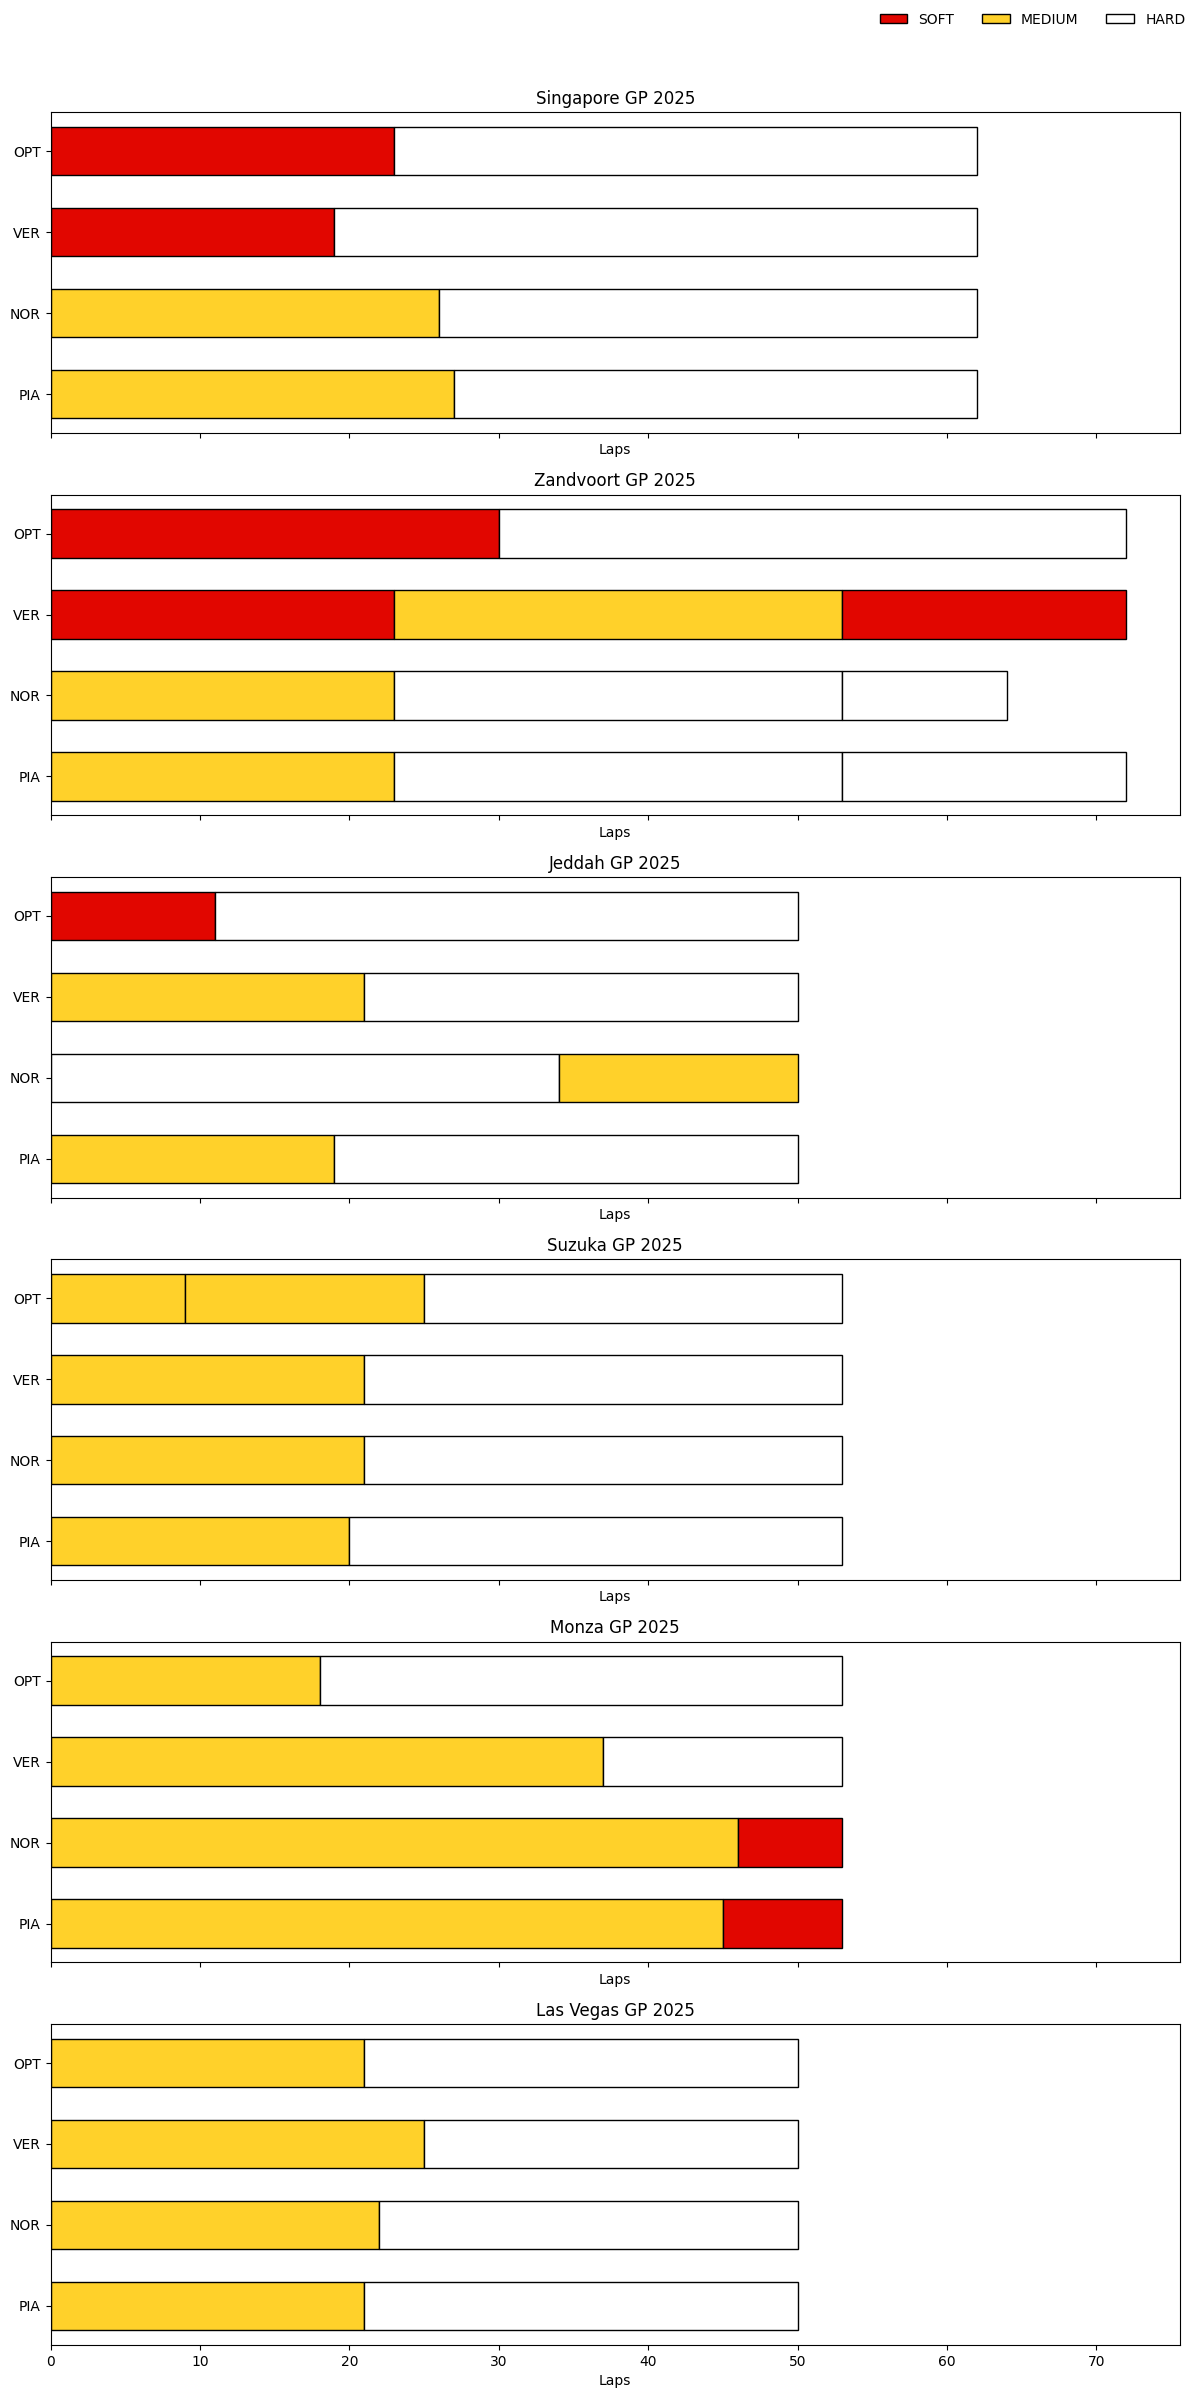

In [82]:
# Creating comparison plot
import math

fig, axes = plt.subplots(
    nrows=len(races),
    ncols=1,
    figsize=(12, 4 * len(races)),
    sharex=True
)

for idx, race in enumerate(races):
    optimizer = F1StrategyOptimizer(
        track=race[0],
        race_laps=race[1],
        pit_stop_overhead=race[2],
        available_tyres=[
            tyre_tuple("SOFT_0", "SOFT", 2),
            tyre_tuple("SOFT_1", "SOFT", 2),
            tyre_tuple("SOFT_2", "SOFT", 3),
            tyre_tuple("SOFT_3", "SOFT", 3),
            tyre_tuple("SOFT_4", "SOFT", 0),
            tyre_tuple("MED_0", "MEDIUM", 7),
            tyre_tuple("MED_1", "MEDIUM", 0),
            tyre_tuple("HARD_0", "HARD", 0),
        ],
        models_path="../models"
    )

    model = optimizer.build_model()

    solver = pyo.SolverFactory("glpk")
    results = solver.solve(model, tee=False)

    df = create_stint_df(2025, optimizer, model)
    df = df[df["driver_number"].isin([0] + driver_numbers)].copy()
    driver_strategies = build_driver_strategies(df)

    plot_driver_strategies_ax(
        ax=axes[idx],
        strategies=driver_strategies,
        title=f"{race[0]} GP 2025"
    )

legend_handles = [
    Rectangle((0, 0), 1, 1, color="#e10600", ec="black", label="SOFT"),
    Rectangle((0, 0), 1, 1, color="#ffd12a", ec="black", label="MEDIUM"),
    Rectangle((0, 0), 1, 1, color="#ffffff", ec="black", label="HARD"),
]

fig.legend(
    handles=legend_handles,
    loc="upper right",
    ncol=3,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()